In [25]:
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
pd.options.display.max_rows=10
pd.options.display.max_columns=6

In [96]:
class UMAP_class:
    
    def __init__(self, datafile, IDs = []):
        self.data = pd.read_csv(datafile)
        self.IDs = IDs
        self.IDdf = self.data.filter(IDs)
        self.nonIDdf = pd.DataFrame(self.data.drop(self.IDs, axis=1))
        
    def analysis(self, metric, n_neighbors=[], min_dist=[], n_components=[]):
        self.reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=metric)
        self.umapdata = pd.DataFrame(self.reducer.fit_transform(self.nonIDdf))
        self.n_components = n_components
        
    def scale(self, scaler):
        self.scaler = scaler
        self.scaledumap = self.scaler.fit_transform(self.umapdata)
        self.scaledumapdf = pd.DataFrame(self.scaledumap)
    
    def df_create(self, umap_data=[]):
        
        def prepend(list, str): 
            str += '{0}'
            list = [str.format(i) for i in list] 
            return(list) 
        
        self.rangemax = self.n_components+1
        self.complist = list(range(1,self.rangemax))
        self.compstr = "UMAP Dim. #"
        self.compcols = prepend(self.complist, self.compstr)
        self.compdf = pd.DataFrame(data = umap_data, columns = self.compcols)
        self.concatlist = [self.IDdf, self.compdf]
        self.umapdf = pd.concat(self.concatlist, axis=1)
        
    def scatter(self, x, y, hue, figsize=[]):
        sns.set(rc={'figure.figsize':figsize})
        sns.scatterplot(x=x, y=y, hue=hue, data=self.umapdf)
        
    def csv(self, csvname):
        self.umapdf.to_csv(csvname, index=False)

In [97]:
reduction = UMAP_class("SCALED_NONAN_DATA.csv", IDs = ['labvisitid', 'presence'])
reduction.analysis('euclidean', n_neighbors=50, min_dist=0.1, n_components=2)
reduction.scale(MinMaxScaler())
reduction.df_create(umap_data=reduction.scaledumap)

In [98]:
reduction.umapdf

,labvisitid,presence,UMAP Dim. #1,UMAP Dim. #2
0,1.0,4.0,0.044605,0.632266
1,2.0,3.2,0.363691,0.092299
2,3.0,3.4,0.360664,0.151313
3,4.0,2.8,0.098238,0.501975
4,5.0,3.4,0.391891,0.108602
...,...,...,...,...
211,259.0,2.8,0.817530,0.436063
212,260.0,3.4,0.785132,0.413302
213,261.0,4.0,0.495816,0.323772
214,262.0,4.8,0.735203,0.335207


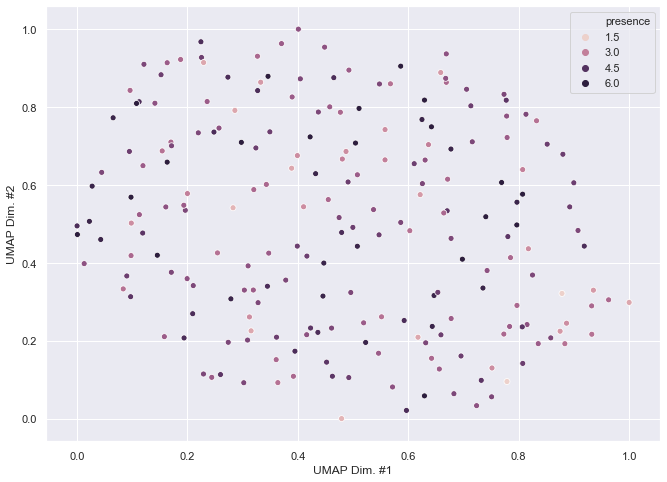

In [99]:
reduction.scatter(x='UMAP Dim. #1', y='UMAP Dim. #2', hue='presence', figsize=(11,8))

In [100]:
reduction.csv("SCALED_UMAP_DATA.csv")